<a href="https://colab.research.google.com/github/jserrataylor/cursoAI/blob/main/Algoritmo_Aprendizaje_Supervisado_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos de Aprendizaje Supervisado**

El script tiene como objetivo procesar, analizar y modelar el famoso conjunto de datos del Titanic, que contiene información sobre los pasajeros del RMS Titanic, para predecir si un pasajero sobrevivió o no al naufragio.

1. **Lectura de datos**: Se cargan los datos del Titanic desde una URL. Estos datos contienen detalles de los pasajeros, como su género, edad, clase de boleto, tarifa pagada, etc., junto con la información de si sobrevivieron o no al desastre.

2. **Preprocesamiento de datos**: Los datos se limpian y preparan para el análisis. Esto implica convertir categorías a números, llenar valores faltantes y normalizar ciertos atributos.

3. **Entrenamiento de modelos**:
   - Se utiliza un modelo de **Naive Bayes** para aprender de los datos y predecir si un pasajero sobreviviría o no basándose en sus características.
   - Además, se introduce un modelo de **Regresión Logística** para el mismo propósito, aunque el entrenamiento real de este modelo se encuentra comentado en el script.

4. **Evaluación**: Una vez que los modelos están entrenados, se evalúa su rendimiento usando un conjunto de datos de prueba. Las métricas como la precisión, exhaustividad y puntuación F1 nos proporcionan una idea de qué tan bien se desempeñan los modelos en la predicción de la supervivencia de los pasajeros.

5. **Visualización**: Se visualiza la matriz de confusión para el modelo de Regresión Logística. La matriz de confusión es una herramienta que nos muestra cómo de bien (o mal) un modelo clasificó las instancias en las diferentes clases (sobrevivió o no sobrevivió).


# Modelo desarrollado con el algoritmo de aprendizaje supervisado: Naive Bayes

Accuracy: 0.7799
Precision: 0.7364
Recall: 0.7297
F1_Score: 0.7330

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       157
           1       0.74      0.73      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



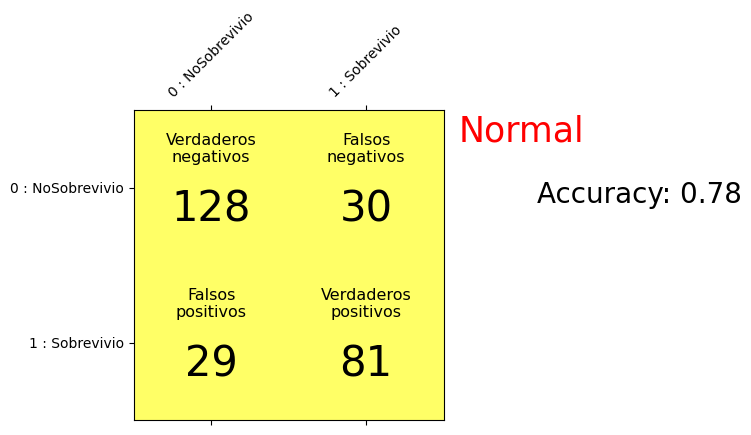

'\nmodel = LogisticRegression(class_weight={0 : 1, 1 : 100}).fit(X_train, y_train)\nmatriz_de_confusion(y_test, model.predict(X_test), "Pesos")\n\nmodel = LogisticRegression(class_weight="balanced").fit(X_train, y_train)\nmatriz_de_confusion(y_test, model.predict(X_test), "Balanceada")\n\nmodel = LogisticRegression(class_weight={0 : 0.69, 1 : 1.85}).fit(X_train, y_train)\nmatriz_de_confusion(y_test, model.predict(X_test), "Equivalente")\n'

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# 1. Lectura de datos
data = pd.read_csv('https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/titanic.csv', delimiter=';')

# Convertir el sexo a numérico
data['Sexo'] = data['Sexo'].map({'Masculino': 0, 'Femenino': 1})

# 2. Tratamiento de valores faltantes
data['Sexo'].fillna(data['Sexo'].mode()[0], inplace=True)
data['Clase'].fillna(data['Clase'].mode()[0], inplace=True)
data['Edad'].fillna(data['Edad'].median(), inplace=True)
data['Familiares'].fillna(data['Familiares'].median(), inplace=True)
data['Tarifa'].fillna(data['Tarifa'].median(), inplace=True)

# 3. Normalización de datos
scaler = MinMaxScaler()
data[['Edad', 'Tarifa', 'Familiares']] = scaler.fit_transform(data[['Edad', 'Tarifa', 'Familiares']])

# 4. Particionamiento de datos
features = ['Sexo', 'Clase', 'Edad', 'Familiares', 'Tarifa']
X = data[features]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### PRIMER ALGORITMO: ALGORITMO DE NAIVE BAYES
# 5. Entrenamiento y predicción con Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluación de Naive Bayes
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1_Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

def matriz_de_confusion(clases_reales, clases_predichas, titulo):
    """ Visualiza la matriz de confusión """
    matriz = confusion_matrix(clases_reales, clases_predichas)
    accuracy = accuracy_score(clases_reales, clases_predichas)

    #Código de matplotlib para graficar
    plt.figure(figsize=(4, 4))
    matriz = pd.DataFrame(matriz, columns=["0 : NoSobrevivio", "1 : Sobrevivio"])
    plt.matshow(matriz, cmap="summer", vmin=0, vmax=20, fignum=1)
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"), ("Falsos\nnegativos", "Verdaderos\npositivos"))
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]), fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j], fontsize=11.5, ha="center", va="center")
    plt.show()

### MATRIZ DE CONFUSIÓN DEL MODELO CON EL ALGORITMO: NAIVE BAYES
# Entrenamiento y visualización con un algoritmo de Naive Bayes
#model = GaussianNB().fit(X_train, y_train)
matriz_de_confusion(y_test, model.predict(X_test), "Normal")

'''
model = LogisticRegression(class_weight={0 : 1, 1 : 100}).fit(X_train, y_train)
matriz_de_confusion(y_test, model.predict(X_test), "Pesos")

model = LogisticRegression(class_weight="balanced").fit(X_train, y_train)
matriz_de_confusion(y_test, model.predict(X_test), "Balanceada")

model = LogisticRegression(class_weight={0 : 0.69, 1 : 1.85}).fit(X_train, y_train)
matriz_de_confusion(y_test, model.predict(X_test), "Equivalente")
'''


# Modelo desarrollado con el algoritmo de aprendizaje supervisado: Regresión Logística

Accuracy: 0.8022
Precision: 0.8021
Recall: 0.6937
F1_Score: 0.7440

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       157
           1       0.80      0.69      0.74       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



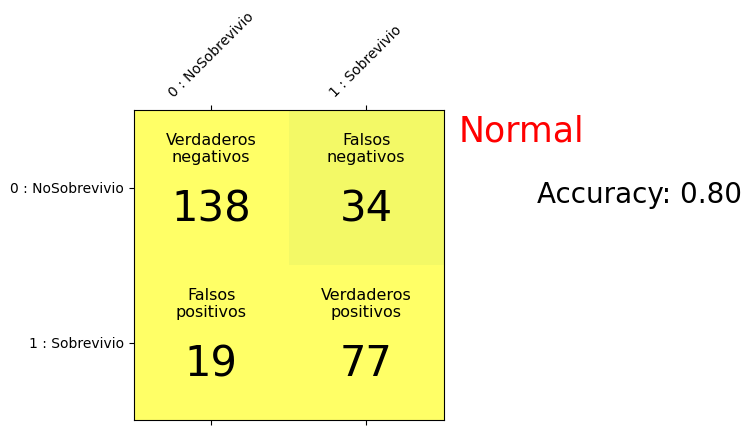

'\nmodel = LogisticRegression(class_weight={0 : 1, 1 : 100}).fit(X_train, y_train)\nmatriz_de_confusion(y_test, model.predict(X_test), "Pesos")\n\nmodel = LogisticRegression(class_weight="balanced").fit(X_train, y_train)\nmatriz_de_confusion(y_test, model.predict(X_test), "Balanceada")\n\nmodel = LogisticRegression(class_weight={0 : 0.69, 1 : 1.85}).fit(X_train, y_train)\nmatriz_de_confusion(y_test, model.predict(X_test), "Equivalente")\n'

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# 1. Lectura de datos
data = pd.read_csv('https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/titanic.csv', delimiter=';')

# Convertir el sexo a numérico
data['Sexo'] = data['Sexo'].map({'Masculino': 0, 'Femenino': 1})

# 2. Tratamiento de valores faltantes
data['Sexo'].fillna(data['Sexo'].mode()[0], inplace=True)
data['Clase'].fillna(data['Clase'].mode()[0], inplace=True)
data['Edad'].fillna(data['Edad'].median(), inplace=True)
data['Familiares'].fillna(data['Familiares'].median(), inplace=True)
data['Tarifa'].fillna(data['Tarifa'].median(), inplace=True)

# 3. Normalización de datos
scaler = MinMaxScaler()
data[['Edad', 'Tarifa', 'Familiares']] = scaler.fit_transform(data[['Edad', 'Tarifa', 'Familiares']])

# 4. Particionamiento de datos
features = ['Sexo', 'Clase', 'Edad', 'Familiares', 'Tarifa']
X = data[features]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### PRIMER ALGORITMO: ALGORITMO DE NAIVE BAYES
# 5. Entrenamiento del modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)
#y_pred = model.predict(X_test)
# Predicción
y_pred = model.predict(X_test)

# Evaluación de Naive Bayes
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1_Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

def matriz_de_confusion(clases_reales, clases_predichas, titulo):
    """ Visualiza la matriz de confusión """
    matriz = confusion_matrix(clases_reales, clases_predichas)
    accuracy = accuracy_score(clases_reales, clases_predichas)

    #Código de matplotlib para graficar
    plt.figure(figsize=(4, 4))
    matriz = pd.DataFrame(matriz, columns=["0 : NoSobrevivio", "1 : Sobrevivio"])
    plt.matshow(matriz, cmap="summer", vmin=0, vmax=20, fignum=1)
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"), ("Falsos\nnegativos", "Verdaderos\npositivos"))
#    etiquetas = (("Verdaderos\nnegativos", "Falsos\nnegativos"), ("Falsos\npositivos", "Verdaderos\npositivos"))
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]), fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j], fontsize=11.5, ha="center", va="center")
    plt.show()

### MATRIZ DE CONFUSIÓN DEL MODELO CON EL ALGORITMO: REGRESION LOGÍSTICA
# Entrenamiento y visualización con un algoritmo de Regresion Logística
#model = LogisticRegression().fit(X_train, y_train)
matriz_de_confusion(y_test, model.predict(X_test), "Normal")

'''
model = LogisticRegression(class_weight={0 : 1, 1 : 100}).fit(X_train, y_train)
matriz_de_confusion(y_test, model.predict(X_test), "Pesos")

model = LogisticRegression(class_weight="balanced").fit(X_train, y_train)
matriz_de_confusion(y_test, model.predict(X_test), "Balanceada")

model = LogisticRegression(class_weight={0 : 0.69, 1 : 1.85}).fit(X_train, y_train)
matriz_de_confusion(y_test, model.predict(X_test), "Equivalente")
'''


Accuracy: 0.8022
Precision: 0.8021
Recall: 0.6937
F1_Score: 0.7440

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       157
           1       0.80      0.69      0.74       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



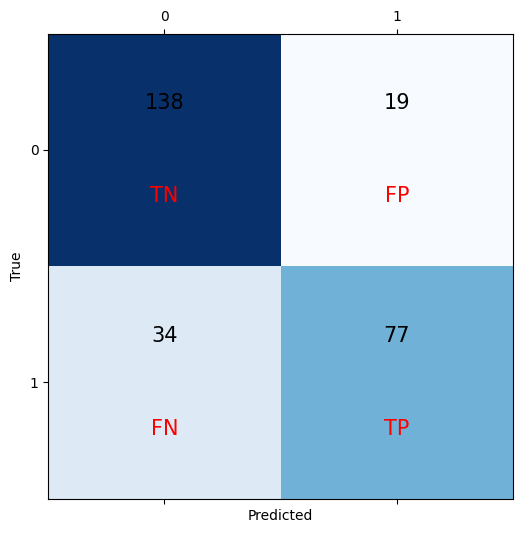

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Lectura de datos
data = pd.read_csv('https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/titanic.csv', delimiter=';')

# Preprocesamiento de datos
data['Sexo'] = data['Sexo'].map({'Masculino': 0, 'Femenino': 1})
data['Sexo'].fillna(data['Sexo'].mode()[0], inplace=True)
data['Clase'].fillna(data['Clase'].mode()[0], inplace=True)
data['Edad'].fillna(data['Edad'].median(), inplace=True)
data['Familiares'].fillna(data['Familiares'].median(), inplace=True)
data['Tarifa'].fillna(data['Tarifa'].median(), inplace=True)

scaler = MinMaxScaler()
data[['Edad', 'Tarifa', 'Familiares']] = scaler.fit_transform(data[['Edad', 'Tarifa', 'Familiares']])

# Particionamiento de datos
features = ['Sexo', 'Clase', 'Edad', 'Familiares', 'Tarifa']
X = data[features]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluación de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1_Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ... (resto del código anterior)

# Visualización de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.matshow(conf_matrix, cmap='Blues', fignum=1)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i - 0.2, conf_matrix[i, j], ha='center', va='center', fontsize=15)  # Números

# Añadir las etiquetas de TN, FP, FN, TP
labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i + 0.2, f"{labels[i][j]}", ha='center', va='center', color='red', fontsize=15)  # Etiquetas

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
